### Step 2: Explore and Assess the Data
#### Explore the Data 
Identify data quality issues, like missing values, duplicate data, etc.

#### Cleaning Steps
Document steps necessary to clean the data

In [2]:
# Install Packages
# ! pip install -U numpy
# ! pip install missingno

In [4]:
import pandas as pd
import numpy as np
import missingno as msno
pd.set_option('display.width',170, 'display.max_rows',200, 'display.max_columns',900)
import tools as tools
from pyspark.sql import SparkSession

In [5]:
spark = SparkSession.builder.\
config("spark.jars.packages","saurfang:spark-sas7bdat:2.0.0-s_2.11")\
.enableHiveSupport().getOrCreate()
df_spark =spark.read.format('com.github.saurfang.sas.spark').load('../../data/18-83510-I94-Data-2016/i94_apr16_sub.sas7bdat')

#### Airport Codes

In [2]:
# read data in

In [6]:
airport_codes = 'airport-codes_csv.csv'
airport_df = pd.read_csv(airport_codes)

In [8]:
airport_df.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"


In [20]:
tools.print_dataframe_info(airport_df)



---------------------
DATAFRAME INFORMATION
---------------------
Dataframe shape: (55075, 12) 

Column Headers: ['ident', 'type', 'name', 'elevation_ft', 'continent', 'iso_country', 'iso_region', 'municipality', 'gps_code', 'iata_code', 'local_code', 'coordinates'] 

ident            object
type             object
name             object
elevation_ft    float64
continent        object
iso_country      object
iso_region       object
municipality     object
gps_code         object
iata_code        object
local_code       object
coordinates      object
dtype: object


In [10]:
tools.print_dataframe_report(airport_df)

ident has 55075 unique values
Listing up to 10 unique values:
['00A' '00AA' '00AK' '00AL' '00AR' '00AS' '00AZ' '00CA' '00CL' '00CN']

---------------------

type has 7 unique values
name has 52144 unique values
Listing up to 10 unique values:
['Total Rf Heliport' 'Aero B Ranch Airport' 'Lowell Field' 'Epps Airpark'
 'Newport Hospital & Clinic Heliport' 'Fulton Airport' 'Cordes Airport'
 'Goldstone /Gts/ Airport' 'Williams Ag Airport'
 'Kitchen Creek Helibase Heliport']

---------------------

elevation_ft has 5450 unique values
Listing up to 10 unique values:
[  11. 3435.  450.  820.  237. 1100. 3810. 3038.   87. 3350.]

---------------------

continent has 7 unique values
iso_country has 244 unique values
Listing up to 10 unique values:
['US' 'PR' 'MH' 'MP' 'GU' 'SO' 'AQ' 'GB' 'PG' 'AD']

---------------------

iso_region has 2810 unique values
Listing up to 10 unique values:
['US-PA' 'US-KS' 'US-AK' 'US-AL' 'US-AR' 'US-OK' 'US-AZ' 'US-CA' 'US-CO'
 'US-FL']

---------------------

mun

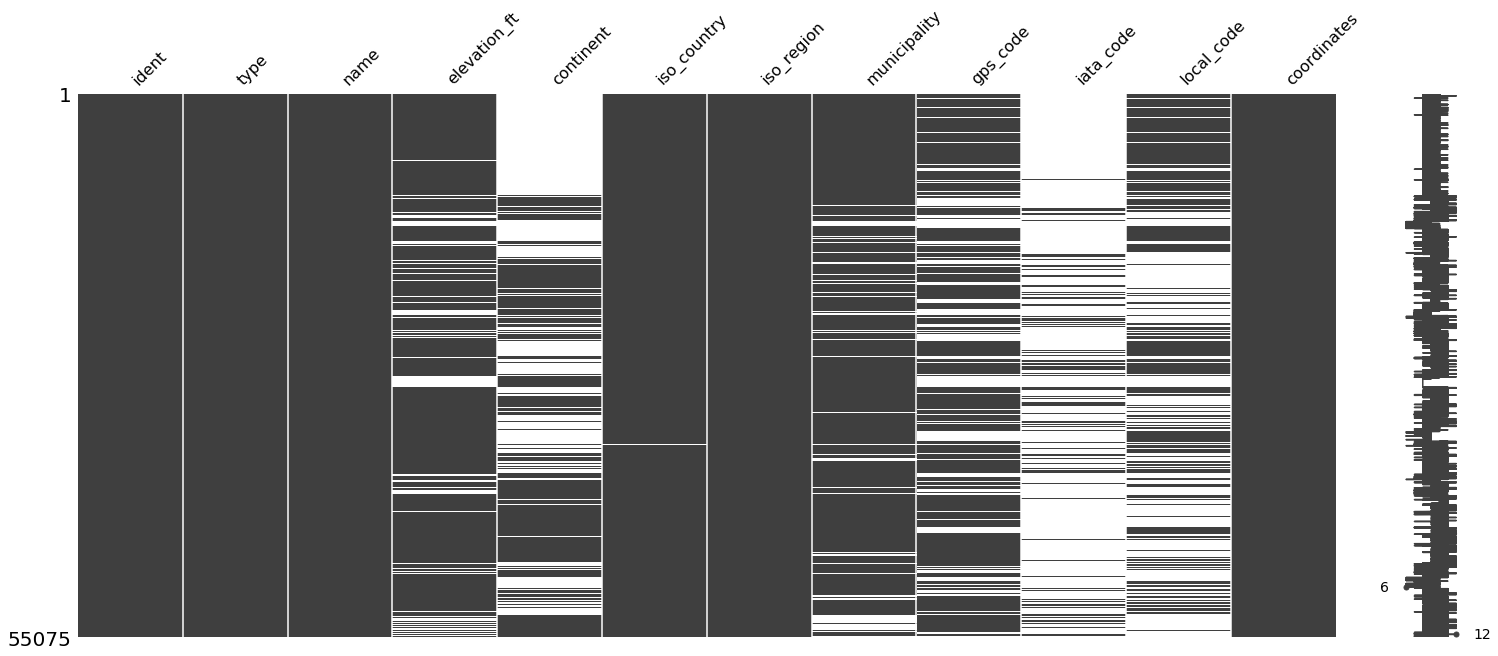

In [11]:
# Display missing values in matrix

msno.matrix(airport_df)

#### Temperature Data

In [ ]:
# read data in

In [7]:
fname = '../../data2/GlobalLandTemperaturesByCity.csv'
temperature_df = pd.read_csv(fname)

In [14]:
temperature_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [8]:
tools.print_dataframe_info(temperature_df)



---------------------
DATAFRAME INFORMATION
---------------------
Dataframe shape: (8599212, 7) 

Column Headers: ['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City', 'Country', 'Latitude', 'Longitude'] 

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object


In [12]:
tools.print_dataframe_report(temperature_df)

dt has 3239 unique values
Listing up to 10 unique values:
['1743-11-01' '1743-12-01' '1744-01-01' '1744-02-01' '1744-03-01'
 '1744-04-01' '1744-05-01' '1744-06-01' '1744-07-01' '1744-08-01']

---------------------

AverageTemperature has 111995 unique values
Listing up to 10 unique values:
[ 6.068    nan  5.788 10.644 14.051 16.082 12.781  7.95   4.639  0.122]

---------------------

AverageTemperatureUncertainty has 10903 unique values
Listing up to 10 unique values:
[1.737   nan 3.624 1.283 1.347 1.396 1.454 1.63  1.302 1.756]

---------------------

City has 3448 unique values
Listing up to 10 unique values:
['Århus' 'Çorlu' 'Çorum' 'Öskemen' 'Ürümqi' 'A Coruña' 'Aachen' 'Aalborg'
 'Aba' 'Abadan']

---------------------

Country has 159 unique values
Listing up to 10 unique values:
['Denmark' 'Turkey' 'Kazakhstan' 'China' 'Spain' 'Germany' 'Nigeria'
 'Iran' 'Russia' 'Canada']

---------------------

Latitude has 73 unique values
Listing up to 10 unique values:
['57.05N' '40.99N' '50

In [ ]:
# Display missing values in matrix
# WARNING: This takes a long time to run

# msno.matrix(temperature_df)

#### Immigration Data

In [ ]:
# read data in

In [8]:
immigration_data = 'immigration_data_sample.csv'
immigration_df = pd.read_csv(immigration_data)

In [16]:
immigration_df.head()

,Unnamed: 0,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,depdate,i94bir,i94visa,count,dtadfile,visapost,occup,entdepa,entdepd,entdepu,matflag,biryear,dtaddto,gender,insnum,airline,admnum,fltno,visatype
0,2027561,4084316.0,2016.0,4.0,209.0,209.0,HHW,20566.0,1.0,HI,20573.0,61.0,2.0,1.0,20160422,NaN,NaN,G,O,NaN,M,1955.0,07202016,F,NaN,JL,5.658267e+10,00782,WT
1,2171295,4422636.0,2016.0,4.0,582.0,582.0,MCA,20567.0,1.0,TX,20568.0,26.0,2.0,1.0,20160423,MTR,NaN,G,R,NaN,M,1990.0,10222016,M,NaN,*GA,9.436200e+10,XBLNG,B2
2,589494,1195600.0,2016.0,4.0,148.0,112.0,OGG,20551.0,1.0,FL,20571.0,76.0,2.0,1.0,20160407,NaN,NaN,G,O,NaN,M,1940.0,07052016,M,NaN,LH,5.578047e+10,00464,WT
3,2631158,5291768.0,2016.0,4.0,297.0,297.0,LOS,20572.0,1.0,CA,20581.0,25.0,2.0,1.0,20160428,DOH,NaN,G,O,NaN,M,1991.0,10272016,M,NaN,QR,9.478970e+10,00739,B2
4,3032257,985523.0,2016.0,4.0,111.0,111.0,CHM,20550.0,3.0,NY,20553.0,19.0,2.0,1.0,20160406,NaN,NaN,Z,K,NaN,M,1997.0,07042016,F,NaN,NaN,4.232257e+10,LAND,WT


In [6]:
tools.print_dataframe_info(immigration_df)



---------------------
DATAFRAME INFORMATION
---------------------
Dataframe shape: (1000, 29) 

Column Headers: ['Unnamed: 0', 'cicid', 'i94yr', 'i94mon', 'i94cit', 'i94res', 'i94port', 'arrdate', 'i94mode', 'i94addr', 'depdate', 'i94bir', 'i94visa', 'count', 'dtadfile', 'visapost', 'occup', 'entdepa', 'entdepd', 'entdepu', 'matflag', 'biryear', 'dtaddto', 'gender', 'insnum', 'airline', 'admnum', 'fltno', 'visatype'] 

Unnamed: 0      int64
cicid         float64
i94yr         float64
i94mon        float64
i94cit        float64
i94res        float64
i94port        object
arrdate       float64
i94mode       float64
i94addr        object
depdate       float64
i94bir        float64
i94visa       float64
count         float64
dtadfile        int64
visapost       object
occup          object
entdepa        object
entdepd        object
entdepu       float64
matflag        object
biryear       float64
dtaddto        object
gender         object
insnum        float64
airline        object
adm

In [14]:
tools.print_dataframe_report(immigration_df)

Unnamed: 0 has 1000 unique values
Listing up to 10 unique values:
[2027561 2171295  589494 2631158 3032257  721257 1072780  112205 2577162
   10930]

---------------------

cicid has 1000 unique values
Listing up to 10 unique values:
[4084316. 4422636. 1195600. 5291768.  985523. 1481650. 2197173.  232708.
 5227851.   13213.]

---------------------

i94yr has 1 unique values
i94mon has 1 unique values
i94cit has 88 unique values
Listing up to 10 unique values:
[209. 582. 148. 297. 111. 577. 245. 113. 131. 116.]

---------------------

i94res has 91 unique values
Listing up to 10 unique values:
[209. 582. 112. 297. 111. 577. 245. 135. 131. 116.]

---------------------

i94port has 70 unique values
Listing up to 10 unique values:
['HHW' 'MCA' 'OGG' 'LOS' 'CHM' 'ATL' 'SFR' 'NYC' 'CHI' 'PHI']

---------------------

arrdate has 30 unique values
Listing up to 10 unique values:
[20566. 20567. 20551. 20572. 20550. 20552. 20556. 20546. 20545. 20571.]

---------------------

i94mode has 4 unique

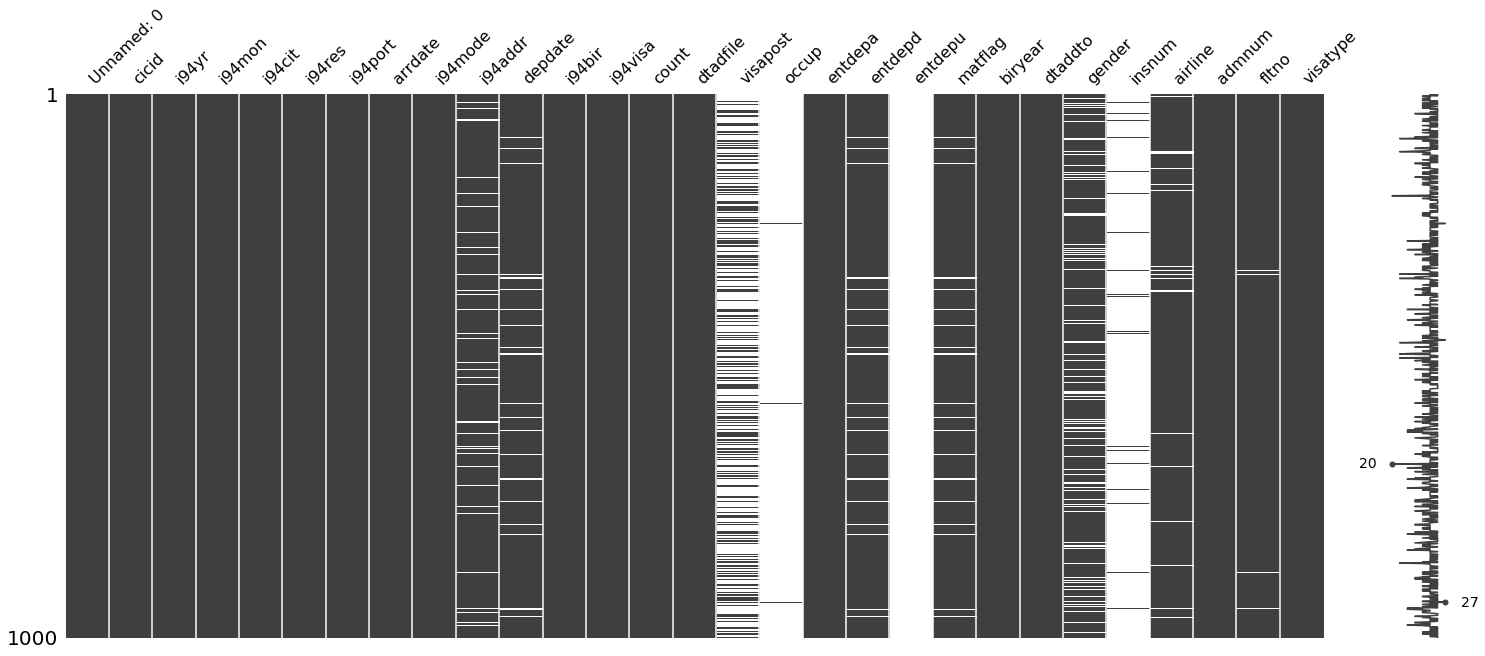

In [18]:
msno.matrix(immigration_df)

In [9]:
# clean_immigration = tools.eliminate_missing_data(immigration_df)

Dropping missing data...
Cleaning complete!


In [10]:
# clean_immigration.head()

,Unnamed: 0,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,depdate,i94bir,i94visa,count,dtadfile,visapost,entdepa,entdepd,matflag,biryear,dtaddto,gender,airline,admnum,fltno,visatype
0,2027561,4084316.0,2016.0,4.0,209.0,209.0,HHW,20566.0,1.0,HI,20573.0,61.0,2.0,1.0,20160422,NaN,G,O,M,1955.0,07202016,F,JL,5.658267e+10,00782,WT
1,2171295,4422636.0,2016.0,4.0,582.0,582.0,MCA,20567.0,1.0,TX,20568.0,26.0,2.0,1.0,20160423,MTR,G,R,M,1990.0,10222016,M,*GA,9.436200e+10,XBLNG,B2
2,589494,1195600.0,2016.0,4.0,148.0,112.0,OGG,20551.0,1.0,FL,20571.0,76.0,2.0,1.0,20160407,NaN,G,O,M,1940.0,07052016,M,LH,5.578047e+10,00464,WT
3,2631158,5291768.0,2016.0,4.0,297.0,297.0,LOS,20572.0,1.0,CA,20581.0,25.0,2.0,1.0,20160428,DOH,G,O,M,1991.0,10272016,M,QR,9.478970e+10,00739,B2
4,3032257,985523.0,2016.0,4.0,111.0,111.0,CHM,20550.0,3.0,NY,20553.0,19.0,2.0,1.0,20160406,NaN,Z,K,M,1997.0,07042016,F,NaN,4.232257e+10,LAND,WT


#### US Cities Demographics

In [ ]:
# read data in

In [15]:
us_cities_demographics = 'us-cities-demographics.csv'
demographics_df = spark.read.csv(us_cities_demographics, inferSchema=True, header=True, sep=';')

In [19]:
demographics_df.toPandas().head()

,City,State,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,State Code,Race,Count
0,Silver Spring,Maryland,33.8,40601.0,41862.0,82463,1562.0,30908.0,2.60,MD,Hispanic or Latino,25924
1,Quincy,Massachusetts,41.0,44129.0,49500.0,93629,4147.0,32935.0,2.39,MA,White,58723
2,Hoover,Alabama,38.5,38040.0,46799.0,84839,4819.0,8229.0,2.58,AL,Asian,4759
3,Rancho Cucamonga,California,34.5,88127.0,87105.0,175232,5821.0,33878.0,3.18,CA,Black or African-American,24437
4,Newark,New Jersey,34.6,138040.0,143873.0,281913,5829.0,86253.0,2.73,NJ,White,76402


In [15]:
tools.print_dataframe_info(demographics_df.toPandas())



---------------------
DATAFRAME INFORMATION
---------------------
Dataframe shape: (2891, 12) 

Column Headers: ['City', 'State', 'Median Age', 'Male Population', 'Female Population', 'Total Population', 'Number of Veterans', 'Foreign-born', 'Average Household Size', 'State Code', 'Race', 'Count'] 

City                       object
State                      object
Median Age                float64
Male Population           float64
Female Population         float64
Total Population            int32
Number of Veterans        float64
Foreign-born              float64
Average Household Size    float64
State Code                 object
Race                       object
Count                       int32
dtype: object


In [16]:
tools.print_dataframe_report(demographics_df.toPandas())

City has 567 unique values
Listing up to 10 unique values:
['Silver Spring' 'Quincy' 'Hoover' 'Rancho Cucamonga' 'Newark' 'Peoria'
 'Avondale' 'West Covina' "O'Fallon" 'High Point']

---------------------

State has 49 unique values
Listing up to 10 unique values:
['Maryland' 'Massachusetts' 'Alabama' 'California' 'New Jersey' 'Illinois'
 'Arizona' 'Missouri' 'North Carolina' 'Pennsylvania']

---------------------

Median Age has 180 unique values
Listing up to 10 unique values:
[33.8 41.  38.5 34.5 34.6 33.1 29.1 39.8 36.  35.5]

---------------------

Male Population has 594 unique values
Listing up to 10 unique values:
[ 40601.  44129.  38040.  88127. 138040.  56229.  38712.  51629.  41762.
  51751.]

---------------------

Female Population has 595 unique values
Listing up to 10 unique values:
[ 41862.  49500.  46799.  87105. 143873.  62432.  41971.  56860.  43270.
  58077.]

---------------------

Total Population has 594 unique values
Listing up to 10 unique values:
[ 82463  9362

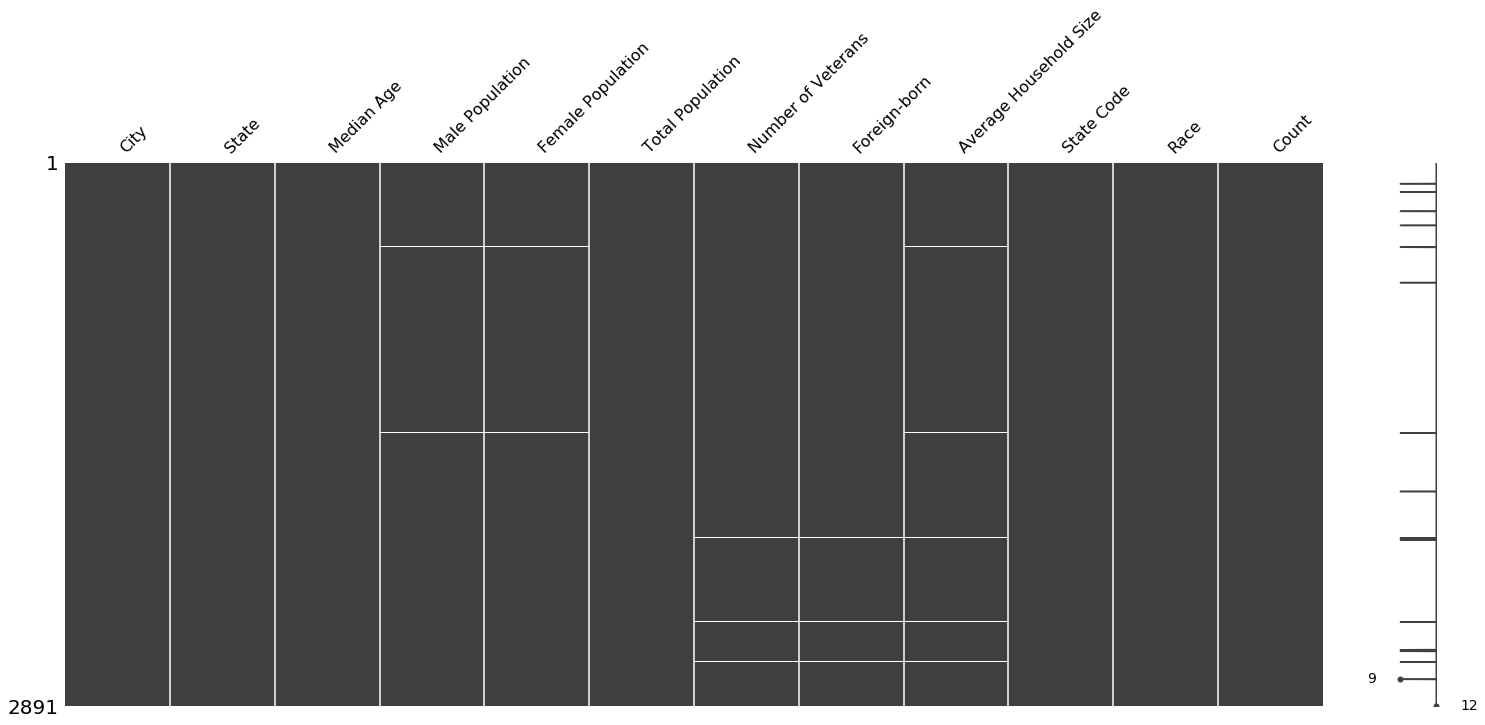

In [17]:
msno.matrix(demographics_df.toPandas())